In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [3]:
path = r'C:\Users\kuohe\ClimateWins\02 Data'

In [4]:
col_names = ['Id','sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv(os.path.join(path, 'iris.csv'), index_col = False, header=None, names=col_names)

In [5]:
df_iris.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [6]:
df_iris = df_iris.drop(index=0).reset_index(drop=True)

In [7]:
df_iris.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#this code did not work
iris_class = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
df_iris['species_name'] = [iris_class[i] for i in df_iris.species]

KeyError: 'Iris-setosa'

In [10]:
# Define a dictionary mapping species names to numerical codes
iris_class = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

# Map species names to codes
df_iris['species_code'] = df_iris['species'].map(iris_class)


In [11]:
print(iris_class)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [12]:
df_iris

,Id,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [14]:
#subset for plotting the petal data
columns = ['petal_length', 'petal_width', 'species_code']
df2 = df_iris[columns]

In [15]:
df2

,petal_length,petal_width,species_code
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


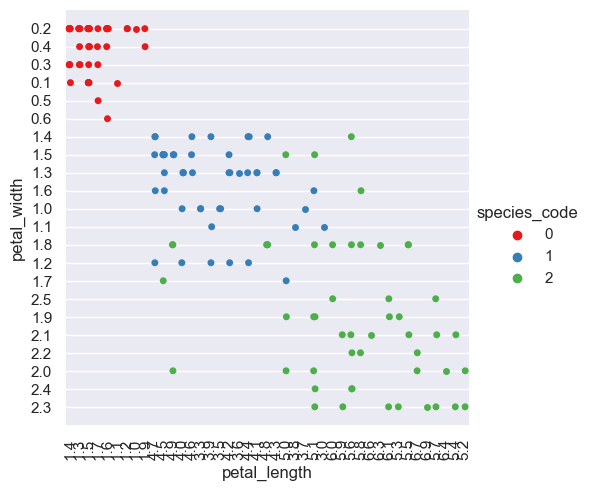

In [20]:
sns.set_theme()
g = sns.catplot(x="petal_length", y="petal_width", hue="species_code", palette='Set1', data=df2)
g.set_xticklabels(rotation=90)

In [21]:
# Check the first few entries of the DataFrame
print(df_iris.head())

# Verify the column names
print(df_iris.columns)


  Id sepal_length sepal_width petal_length petal_width      species  \
0  1          5.1         3.5          1.4         0.2  Iris-setosa   
1  2          4.9         3.0          1.4         0.2  Iris-setosa   
2  3          4.7         3.2          1.3         0.2  Iris-setosa   
3  4          4.6         3.1          1.5         0.2  Iris-setosa   
4  5          5.0         3.6          1.4         0.2  Iris-setosa   

   species_code  
0             0  
1             0  
2             0  
3             0  
4             0  
Index(['Id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species', 'species_code'],
      dtype='object')


In [24]:
df_iris.dtypes

Id              object
sepal_length    object
sepal_width     object
petal_length    object
petal_width     object
species         object
species_code     int64
dtype: object

In [25]:
# Convert columns to integer
df_iris['sepal_length'] = pd.to_numeric(df_iris['sepal_length'], errors='coerce').fillna(0).astype('int64')
df_iris['sepal_width'] = pd.to_numeric(df_iris['sepal_width'], errors='coerce').fillna(0).astype('int64')
df_iris['petal_length'] = pd.to_numeric(df_iris['petal_length'], errors='coerce').fillna(0).astype('int64')
df_iris['petal_width'] = pd.to_numeric(df_iris['petal_width'], errors='coerce').fillna(0).astype('int64')

#check the dtypes again
df_iris.dtypes


Id              object
sepal_length     int64
sepal_width      int64
petal_length     int64
petal_width      int64
species         object
species_code     int64
dtype: object

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

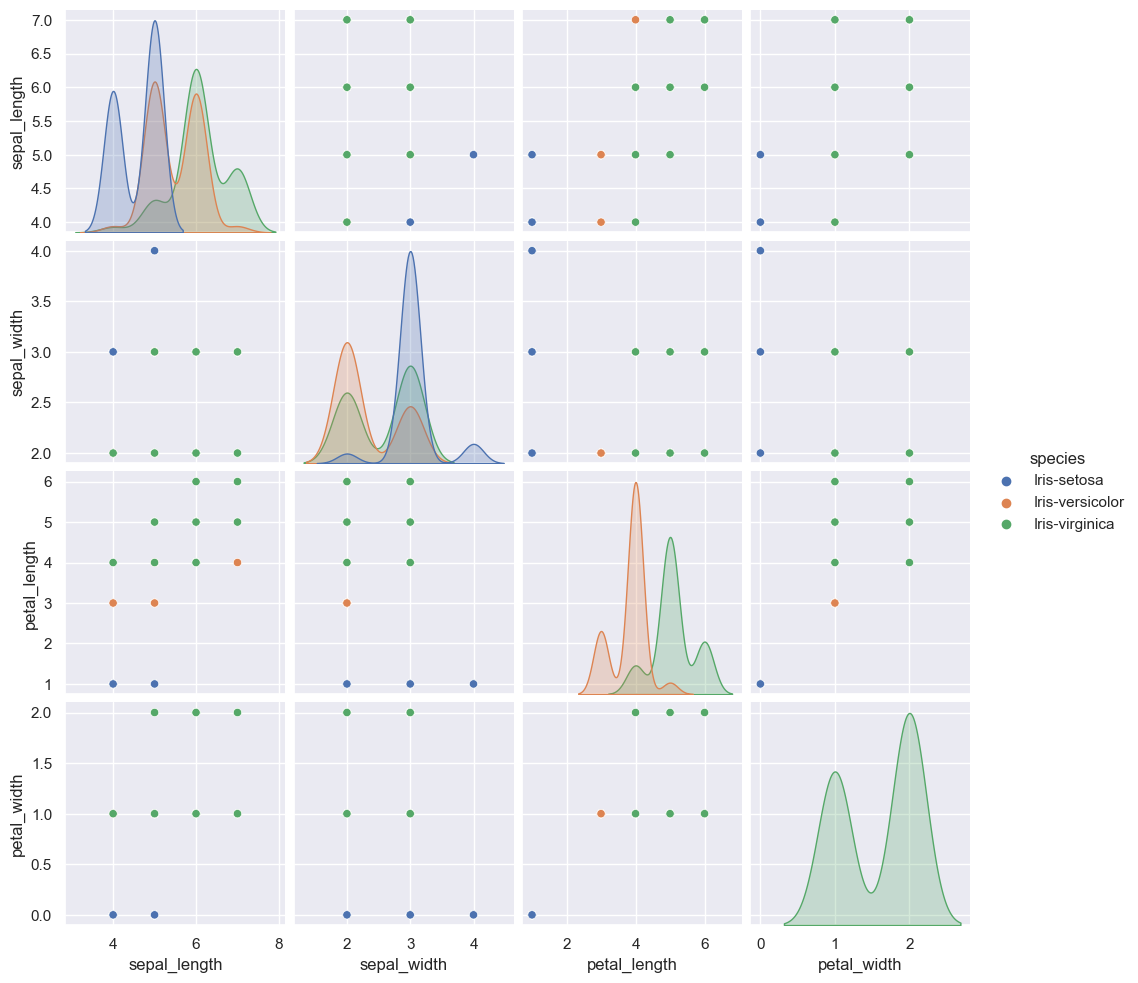

In [26]:
sns.pairplot(df_iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue = 'species')
plt.show()

In [28]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_iris.drop(['species', 'species_code'], axis=1)
y = df_iris.species

In [29]:
print(X.shape)
print(y.shape)

(150, 5)
(150,)


In [30]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 5)
(38, 5)
(112,)
(38,)


In [33]:
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.values.ravel() if isinstance(y_train, pd.Series) else y_train

In [37]:
X_train = np.ascontiguousarray(X_train)
y_train = np.ascontiguousarray(y_train)
X_test = np.ascontiguousarray(X_test)
y_test = np.ascontiguousarray(y_test)

In [38]:
#Run the model with neighbors equal to 1 to 60, test the accuracy
k_range = np.arange(1,60)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

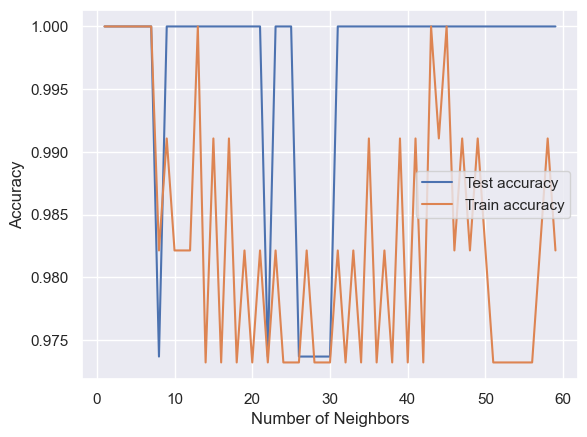

In [39]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

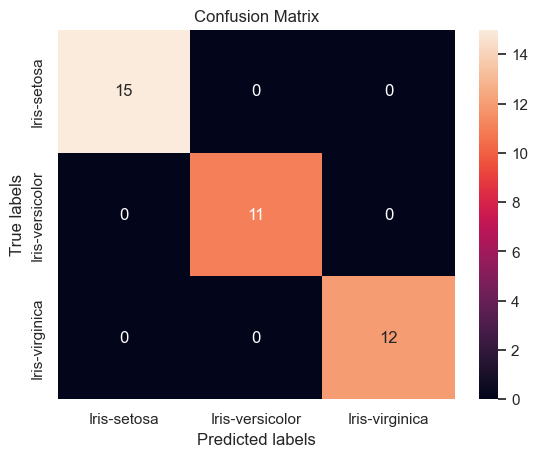

In [40]:
#Confusion matrix based on the last "k" in the sequence
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica',]    

ax= plt.subplot()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

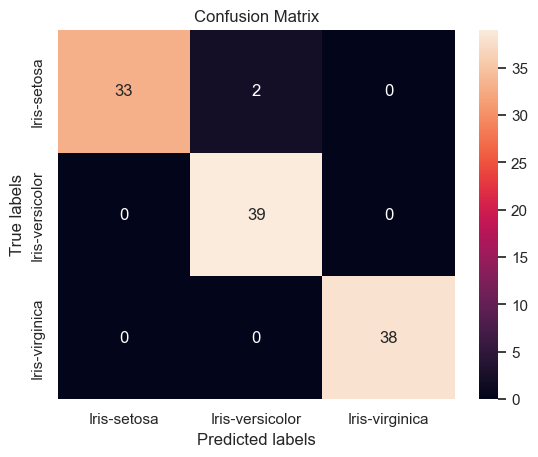

In [41]:
#Confusion matrix based on the last "k" in the sequence
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica',]    

ax= plt.subplot()

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);